In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
def clean_data(df):

    '''
    Convert the column names to strings and set the column 'Area' as the index
    
    '''

    df.columns = df.columns.map(str)
    df.set_index('Area', inplace=True)

survivalrates = {}

# Read and clean sheets on survival rates
for i in range(2002, 2019):
    survivalrates[str(i)] = pd.read_excel('data/prepared_data.xlsx', sheet_name= str(i) + ' Survival Rates')
    clean_data(survivalrates[str(i)])

# Read and clean sheets on active enterprises
activeenterprises = pd.read_excel('data/prepared_data.xlsx', sheet_name= 'Active Enterprises by Year')
clean_data(activeenterprises)

# Read and clean sheets on death rates
deathrates = pd.read_excel('data/prepared_data.xlsx', sheet_name= 'Death Rates in % by Year')
clean_data(deathrates)

# Basic Statistics
## Survival Rates
As there is a sheet for the survival rates of businesses created in each year for multiple years, we will analyse one and assume that the basic statistics of other sheets would be similar.


In [89]:
print(survivalrates['2002'].head(5))
print(survivalrates['2002'].describe())

                           Code  1 Year Survival in %  2 Year Survival in %  \
Area                                                                          
City of London        E09000001                  89.5                  79.9   
Barking and Dagenham  E09000002                  94.3                  77.0   
Barnet                E09000003                  93.8                  77.5   
Bexley                E09000004                  92.8                  77.8   
Brent                 E09000005                  93.6                  69.4   

                      3 Year Survival in %  4 Year Survival in %  \
Area                                                               
City of London                        66.4                  57.6   
Barking and Dagenham                  57.5                  47.1   
Barnet                                55.4                  44.2   
Bexley                                61.4                  50.3   
Brent                                 

It is expected that mean of each column will decrease because survival rates of businesses decrease as we measure longer periods. To get a better visualisation of the data, we will do a simple line graph of the 1, 2, 3, 4 and 5 year survival rates of businesses that started in 2002.

In [ ]:
# Transpose the dataframe so that it can be plotted
survivalrates_transposed = survivalrates['2002'].transpose()

# Remove the row for 'Code' as it is not numeric
survivalrates_transposed.drop(['Code'], inplace = True)

print(survivalrates_transposed.head(5))

# Plot the transposed dataframe for all boroughts
survivalrates_transposed.plot()
plt.title('Survival Rates on Businesses that Started in 2002')
plt.xlabel('Survival Rates')
plt.ylabel('%')
plt.savefig('charts/survival_rates_2002.png')


As this is just exploring the data, the chart is messy. During the data visualisation stage, line graphs for all years for all boroughs will be created. The client would be able to choose the borough and then view the graph for each year in a slideshow feature. This would enable them to see whether there is a steep trend of survival rates, which would shed light on the difficulty of surviving from one year to another.

## Active Enterprises

In [ ]:
print(activeenterprises.head(5))

From looking at the data, it makes more sense to view the descriptions of the data by the borough. This is because the number of active enterprsies varies greatly by the borough, but less so throughout the years.

In [ ]:
# Transpose the dataframe
activeenterprises_transposed = activeenterprises.transpose()

# Remove the row for 'Code' as it is not numeric
activeenterprises_transposed.drop(['Code'], inplace = True)

# Plot the transposed dataframe for all boroughts
activeenterprises_transposed.plot()
plt.title('Active Enterprises Through the Years')
plt.xlabel('Years')
plt.ylabel('Numbers')
plt.savefig('charts/active_enterprises.png')

print(activeenterprises.describe())

In the future, individual line graphs will be created for the client to view each one separately.

## Death Rates

# Problem 1: Are there any general trends with regard to 5-year survival rates?
As we're interested in analysing the 5-year survival rates, we will create a dataframe with just that data for multiple years. As the available data is only up to year 2019, there is only data of the 5-year survival rates up to year 2014.

In [83]:
# Create a list and append Code and Area
five_year_survival_rate_list = []
five_year_survival_rate_list.append(list(survivalrates['2002'].index))
five_year_survival_rate_list.append(list(survivalrates['2002']['Code']))

# Append the relevant 5 year survival rates for businesses created in various years
for i in range (2002, 2015):
    five_year_survival_rate_list.append(list(survivalrates[str(i)]['5 Year Survival in %']))

# Transpose and read the dataframe
five_year_survival_rate_df = pd.DataFrame(five_year_survival_rate_list).transpose()

# Set the column names
five_year_survival_rate_df.columns=['Area', 'Code', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']

print(five_year_survival_rate_df)

                      Area       Code  2002  2003  2004  2005  2006  2007  \
0           City of London  E09000001  52.4  52.7  52.8  43.3  50.2  49.8   
1     Barking and Dagenham  E09000002  40.2  39.1  38.5  33.9  39.2  38.2   
2                   Barnet  E09000003  36.7  38.2  39.4  42.4  42.1  42.5   
3                   Bexley  E09000004  42.5  43.6  44.1  45.4  45.8  43.1   
4                    Brent  E09000005  32.1    34  38.6    40    38  39.7   
5                  Bromley  E09000006  44.1  46.1  46.9  42.4  44.9  43.7   
6                   Camden  E09000007  40.5  41.9  47.5  43.1  42.7  43.4   
7                  Croydon  E09000008  40.1  41.3  42.9  42.1  38.6  41.4   
8                   Ealing  E09000009  40.8  35.1  38.8  37.3  40.8  38.6   
9                  Enfield  E09000010  39.7  41.9  42.9    39  39.7  41.6   
10               Greenwich  E09000011    37  39.7    40  40.6  39.9  39.7   
11                 Hackney  E09000012  39.8    43  44.3  42.5  43.2  46.1   

Cleaning the data.

In [84]:
# Drop unnessary columns
five_year_survival_rate_df.drop('Code', axis = 1, inplace=True)

# Clean the data
clean_data(five_year_survival_rate_df)

print(five_year_survival_rate_df.info(verbose=True))

for i in range(2002, 2015):
    five_year_survival_rate_df[str(i)] = five_year_survival_rate_df[str(i)].astype(float)

print(five_year_survival_rate_df)


<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, City of London to Westminster
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2002    33 non-null     object
 1   2003    33 non-null     object
 2   2004    33 non-null     object
 3   2005    33 non-null     object
 4   2006    33 non-null     object
 5   2007    33 non-null     object
 6   2008    33 non-null     object
 7   2009    33 non-null     object
 8   2010    33 non-null     object
 9   2011    33 non-null     object
 10  2012    33 non-null     object
 11  2013    33 non-null     object
 12  2014    33 non-null     object
dtypes: object(13)
memory usage: 3.6+ KB
None
                        2002  2003  2004  2005  2006  2007  2008  2009  2010  \
Area                                                                           
City of London          52.4  52.7  52.8  43.3  50.2  49.8  33.2  36.3  39.3   
Barking and Dagenham    40.2  39.1  38.5  33.9  39.2  

Now we will create a box plot to view the spread of the 5-year survival rates for each year to analyse the general trend of these rates, which is one of our business question. It also helps us to find if there are any outliers in the data. 

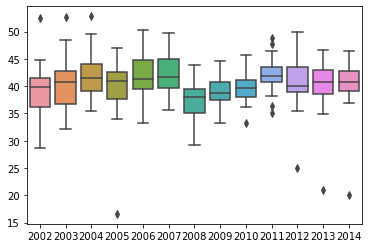

In [93]:
# View boxplot and save as an image
sns.boxplot(data=five_year_survival_rate_df).get_figure().savefig('charts/boxplot.png')

From the boxplot, we observe that there is no general trend with regard to 5-year survival rates as the interquartile range and median for all years do not vary signicantly. An exception would be the 5-year survival rates for businesses created in 2008, but could be due to the 2008 financial crisis.

We also analyse that there are some outliers. To check if these outliers should be removed, we will analyse the extreme outliers in year 2005, 2012, 2013 and 2014.

To analyse this further, it would be good to see the other survival rates of this area.

As it seems that the data is just an extreme value, it will not be removed.

# Problem 2: Based on data on past years, which borough has the best 5-year survival rate?

As we are trying to find the borough with the best 5-year survival rate, we will calculate the average 5 year survival rate for each borough. We will also save this dataframe with the new column with the averages as a separate sheets in the Excel file for future use.

In [ ]:
five_year_survival_rate_df['mean'] = five_year_survival_rate_df.iloc[:, 1:14].mean(axis=1)

# Add a new sheet to the existing file
with pd.ExcelWriter('data/prepared_data.xlsx',
                    mode = 'a', engine='openpyxl') as writer:  
    five_year_survival_rate_df.to_excel(writer, sheet_name='5-Year Survival Rates')

To see the averages of all boroughs and identify the one with the highest average, we will view this data on a barchart.

In [ ]:
# View the 5-year survival rate average for each borough
five_year_survival_rate_df.plot.bar(y='mean')

# Identify the borough with the highest average
max = five_year_survival_rate_df['mean'].idxmax()
print('Borough with the highest 5-year survival rate is ' + str(max) + ' with a survival rate of ' + str(round(five_year_survival_rate_df['mean'].max())) + '%')

Thus, we identify that Sutton has the highest 5-year survival rate based on past data. 

# Problem 3: Which boroughs have the highest economic activity, indicated by the number of active enterprises?

Next, we will look at the number of active enterprises in each area. To get a better idea of the current economic situtation in each borough, we will use data from the most recent year available in the dataset (year 2019), to find the borough with the highest number of active enterprises.

In [ ]:
activeenterprises_2019 = activeenterprises['2019'].copy()
activeenterprises_2019.plot.bar(y='mean')

# Identify the borough with the highest average
max = activeenterprises_2019.idxmax()
print('Borough with the highest number of active enterprises in 2019 is ' + str(max) + ' with ' + str(activeenterprises_2019.max()) + ' enterprises')

# Problem 4: Which boroughs have the highest death rates?
Finally, we will look at the average death rates 